In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
df = pd.read_excel('ajustado (2).xlsx')

## Informações Gerais

In [48]:
#drops first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,NaN,NaN,Alejandro Cloos,2.0,Ilca 7,24,0,GERAL,19.0,NaN,205.0,174,Central and South American Championship 2022
1,NaN,NaN,Alejandro Cloos,2.0,Ilca 7,18,0,GERAL,19.0,NaN,205.0,174,Central and South American Championship 2022
2,NaN,NaN,Alejandro Cloos,2.0,Ilca 7,20,0,GERAL,19.0,NaN,205.0,174,Central and South American Championship 2022
3,NaN,NaN,Alejandro Cloos,2.0,Ilca 7,22,0,GERAL,19.0,NaN,205.0,174,Central and South American Championship 2022
4,NaN,NaN,Alejandro Cloos,2.0,Ilca 7,24,0,GERAL,19.0,NaN,205.0,174,Central and South American Championship 2022


In [49]:
print("O DataFrame contém {} entradas com {} colunas".format(df.shape[0], df.shape[1]))

O DataFrame contém 136618 entradas com 13 colunas


In [50]:
print("As colunas são: {}".format(df.columns.values))

As colunas são: ['ID Resultado' 'ID Competidor' 'Nome Competidor' 'ID Competição'
 'Classe Vela' 'Pontuação Regata' 'Descarte' 'Flotilha' 'Posição Geral'
 'Punição' 'Pontuação Total' 'Nett' 'Nome Competição']


In [51]:
competidores = np.unique(df['Nome Competidor'])
print("No total, há {} competidores".format(len(competidores)))

No total, há 6364 competidores


In [52]:
for classe in np.unique(df['Classe Vela']):
    print(classe)

470
49er
49erFX
Formula Kite Fem.
Formula Kite Masc.
IQFOIL Fem.
IQFOIL Masc.
Ilca 6
Ilca 7
Nacra 17


# Distribuição dos registro por classe

In [53]:
#group per class and count the unique competitions
count_classes = df.groupby('Classe Vela')['ID Competição'].nunique().sort_values(ascending=False)
count_classes

Classe Vela
49er                  27
Ilca 6                27
Ilca 7                27
49erFX                26
470                    7
IQFOIL Fem.            7
IQFOIL Masc.           7
Nacra 17               7
Formula Kite Fem.      6
Formula Kite Masc.     6
Name: ID Competição, dtype: int64

In [57]:
#groups the data per class and then per competition and then counts the unique competitors
count_classes = df.groupby(['Classe Vela', 'ID Competição'])['Nome Competidor'].nunique().sort_values(ascending=False)
#now takes the mean inside each class
count_classes = count_classes.groupby('Classe Vela').mean().sort_values(ascending=True)
count_classes



Classe Vela
Nacra 17               37.285714
49erFX                 42.346154
Formula Kite Fem.      47.500000
470                    60.857143
49er                   64.629630
IQFOIL Fem.            75.142857
Ilca 6                 86.000000
Formula Kite Masc.     90.000000
IQFOIL Masc.          105.428571
Ilca 7                120.629630
Name: Nome Competidor, dtype: float64

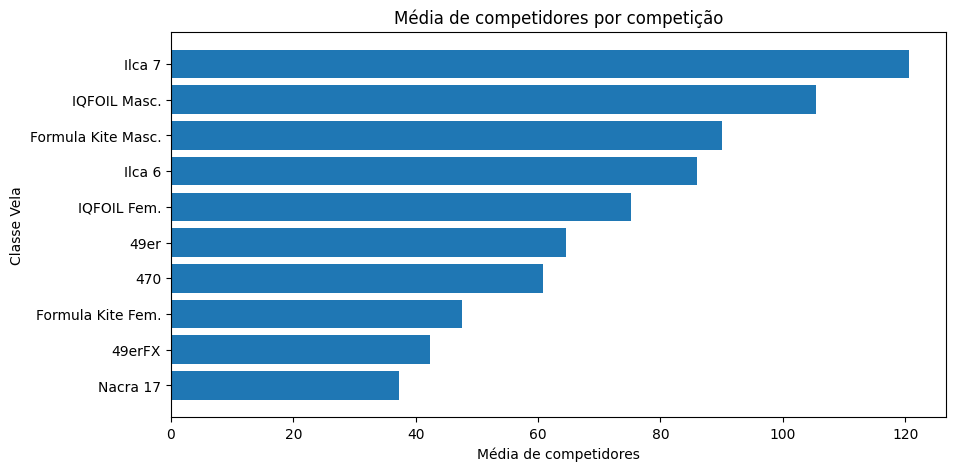

In [55]:
#plots the data above
plt.figure(figsize=(10,5))
plt.title('Média de competidores por classe')
plt.xlabel('Média de competidores')	
plt.ylabel('Classe Vela')
plt.barh(count_classes.index, count_classes.values)
plt.show()



In [60]:
dfProv = df.copy()
#competição sem ano (sem os ultimos 4 caracteres)
dfProv['Competição'] = dfProv['Nome Competição'].str[:-5]

In [65]:
#groups the data per class and then per competition and then counts the unique competitors
count_competition = dfProv.groupby(['Competição', 'ID Competição'])['Nome Competidor'].nunique().sort_values(ascending=False)
#now takes the mean inside each class
count_competition = count_competition.groupby('Competição').mean().sort_values(ascending=True)
count_competition

Competição
Central and South American Championship    115.333333
European Championship                      312.285714
Semaine Olympique Francaise De Voile       317.666667
World Championship                         432.111111
Trofeo S.A.R Princesa Sofia                475.666667
Name: Nome Competidor, dtype: float64

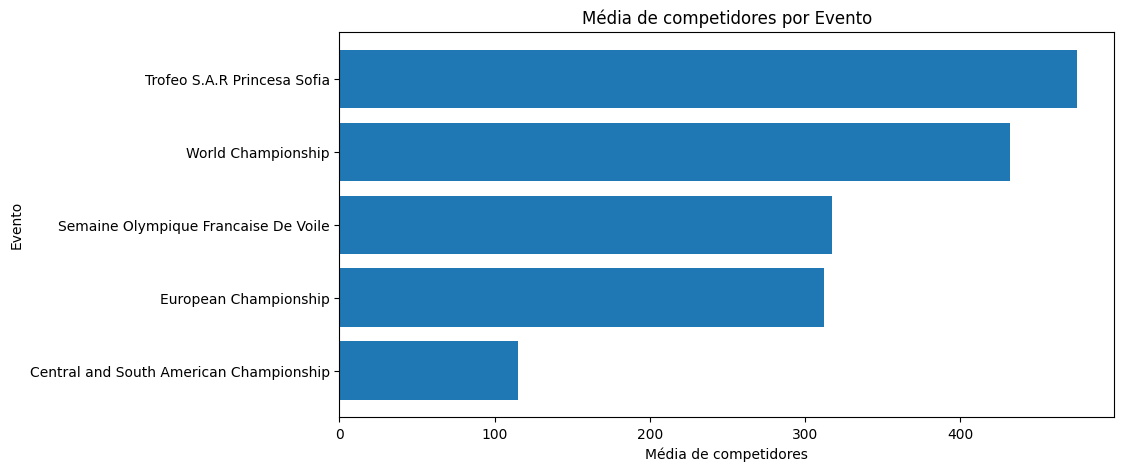

In [66]:
#plots the data above
plt.figure(figsize=(10,5))
plt.title('Média de competidores por Evento')
plt.xlabel('Média de competidores')	
plt.ylabel('Evento')
plt.barh(count_competition.index, count_competition.values)
plt.show()



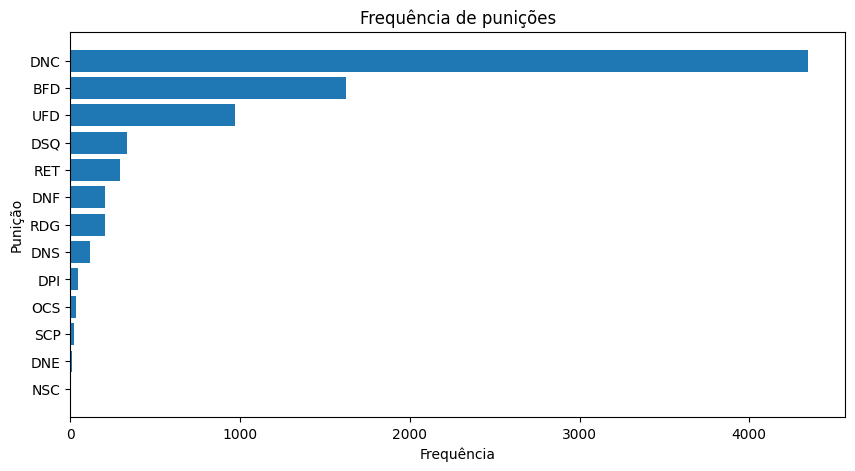

In [75]:
#show the frequency of each punishment
punicao = df['Punição'].value_counts().sort_values(ascending=True)


punish = ['DNC','DNS','OCS','ZFP','UFD','BFD','SCP','NSC','DNF','RET','DSQ','DNE','RDG','DPI']
#if punicao is not in punish remove it
punicao = punicao[punicao.index.isin(punish)]

#plots the data above
plt.figure(figsize=(10,5))
plt.title('Frequência de punições')
plt.xlabel('Frequência')
plt.ylabel('Punição')
plt.barh(punicao.index, punicao.values)
plt.show()


# Distribuição dos registro por pontos

In [31]:
df['Pontuação Total'].replace(',', '.', regex=True, inplace=True)


In [33]:
df['Pontuação Total'] = pd.to_numeric(df['Pontuação Total'])

(array([1.2510e+04, 5.7084e+04, 3.9051e+04, 1.5952e+04, 4.8120e+03,
        1.5600e+03, 4.6800e+02, 3.6000e+02, 1.8000e+02, 2.0000e+01]),
 array([1.0000e+00, 1.2730e+02, 2.5360e+02, 3.7990e+02, 5.0620e+02,
        6.3250e+02, 7.5880e+02, 8.8510e+02, 1.0114e+03, 1.1377e+03,
        1.2640e+03]),
 <BarContainer object of 10 artists>)

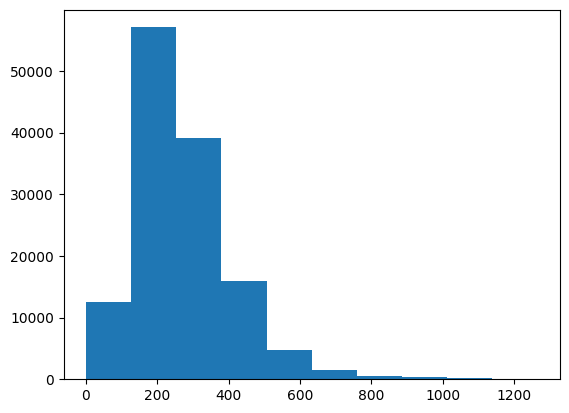

In [34]:
plt.hist(df['Pontuação Total'])

## Distribuicao por posicoes

!! Avaliar, esta com um dado dando treta !!

In [39]:
for posicao in df['Posição Geral']:

0         19
1         19
2         19
3         19
4         19
          ..
136613     6
136614     7
136615     8
136616     9
136617    10
Name: Posição Geral, Length: 136618, dtype: object

In [41]:
df['Posição Geral'] = pd.to_numeric(df['Posição Geral'])

ValueError: Unable to parse string "31EX" at position 23017

In [44]:
df.loc[23015:23020, 'Posição Geral']

23015      34
23016      34
23017    31EX
23018    31EX
23019    31EX
23020    31EX
Name: Posição Geral, dtype: object

31EX???

## Registro por competicoes

In [56]:
count_competicoes = df.groupby('Nome Competição').count()['Unnamed: 0']

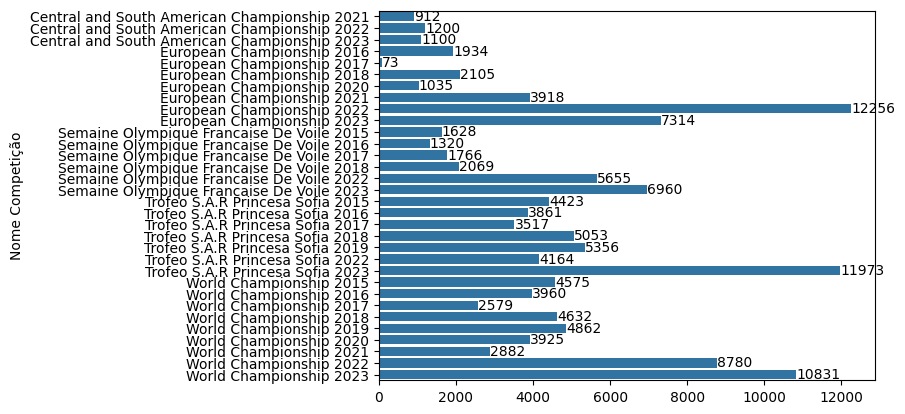

In [59]:
ax = sns.barplot(
    x = count_competicoes.values,
    y = count_competicoes.index)
for i in ax.containers:
    ax.bar_label(i,)

## Punições possíveis

In [68]:
grouup
count_punicoes = df.groupby('Punição')
count_punicoes

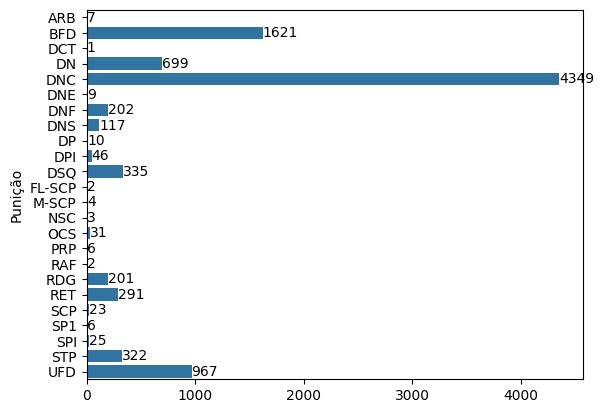

In [65]:
ax = sns.barplot(
    x = count_punicoes.values,
    y = count_punicoes.index)
for i in ax.containers:
    ax.bar_label(i,)